# CE888 Assignment 1

This code is written as part of requirments of CE888 Data Science and Decision Making for Task 1 of Project 1.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 5 February 2019<br> 
**Last modified on**: 5 February 2019<br> 

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file = '../data/malware/dataset.train'
with open(file, 'r') as f:
    data = f.read()

# split data into lines
lines = data.split('\n')

In [3]:
num_features = 513 # number of features

# split each lint into cells and obtain feature matrix
samples = []
targets = []
for line in lines:
    cells = line.split(' ')[1:-2]
    sample = {cell.split(':')[0]:cell.split(':')[1] for cell in cells}
    sample = [1 if str(i) in sample.keys() else 0 \
              for i in range (1, num_features + 1)]
        
    samples.append (sample)
    if line.split(' ')[0] == '+1': targets.append (1)
    else: targets.append(-1)
    
samples_np = np.array(samples)
samples_np.shape

(374, 513)

In [4]:
targets_np = np.array (targets)
targets_np.shape

(374,)

In [5]:
samples_df = pd.DataFrame (samples)
samples_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,503,504,505,506,507,508,509,510,511,512
0,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [6]:
targets_df = pd.DataFrame (targets)
targets_df = targets_df.rename(columns={0: 'Class'})
targets_df.head(5)

,Class
0,1
1,1
2,1
3,1
4,1


In [7]:
data_df = pd.concat ([samples_df, targets_df], axis = 1)
data_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,Class
0,1,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,1,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,1,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
def histogram(df_data):
    num_cols = len(df_data.columns)

    # convert DataFrame to numpy array
    data = df_data.values

    # define figure grid
    if num_cols < 6:
        row, col = 1, num_cols
    else:
        row, col = num_cols//4+1, 4

    # create figure object
    fig = plt.figure(figsize = (col*5, row*3))
    
    # plot data
    for i in range(num_cols):
        plt.subplot (row, col, i+1)
        plt.title (df_data.columns[i])
        sns.distplot(df_data[df_data.columns[i]].values, kde=False, rug=False)

In [ ]:
histogram(data_df)        

In [34]:
# heatmap of the correlation coefficient matrix
cr_np = np.corrcoef (data_df.values.T)
cr_df = pd.DataFrame (cr_np)
cr_df = cr_df.fillna (0)
cr_np = cr_df.values
cr_np

(514, 514)

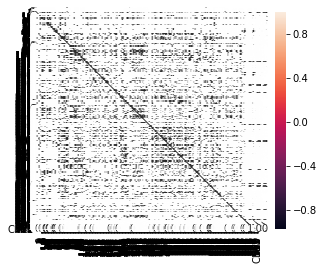

In [35]:
fig = plt.figure()
hm = sns.heatmap(cr_np, cbar = True, annot = True, square = True, 
                 fmt = '.2f', annot_kws = {'size': 10},
                 yticklabels = data_df.columns,
                 xticklabels = data_df.columns)
plt.show ()